## Análisis Económico del Estado de California

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

Sin pretender reemplazar un análisis puntual necesario para cada emprendimiento gastronómico que desee establecerse o ampliarse, en el presente informe se analizarán las condiciones económicas y demográficas promedio del Estado de California. 

Debe dejarse debidamente asentado que, si bien pueden formar parte de un análisis posterior, no integran la investigación inicial (ni el conjunto de datos analizado) informes sobre costos de establecimiento, impuestos iniciales y periódicos, gastos de franquicia, ni otros. Se reitera, pueden ser abarcados en otra oportunidad por EPICUREAN Data Solutions como un producto diferente, pero no como parte del presente proyecto.

Comencemos analizando, incialmente, datos poblacionales y estadísticos que dan cuenta de las características de la población.

In [2]:
df_censo = pd.read_parquet(r'C:\Users\GASTON\Desktop\PROYECTO FINAL\DATA\datosEconomicos.parquet')
df_censo.head(3)


,County,Per capita income,Rent,Property Cost
0,Alameda,97754,2837,1250000
1,Alpine,67551,2398,508142
2,Amador,48463,2742,490000


El presente DataFrame es un conjunto de datos extraídos de la página https://data.census.gov/ en la que se toman determinados parámetros económicos del Estado de California. El proceso de extracción se encuentra debidamente documentado en la sección correspondiente.

Como puede verse, los datos ofrecidos por el Census Bureau of United States se encuentran agrupados por Condado (County). Ello, si bien no es el mejor escenario de fragmentación, es suficiente para abordar el estado general de la población. En nuestro [Análisis Exploratorio de Datos](/Data%20Analytics/Análisis%20Exploratorio%20de%20Datos.ipynb) se ha tomado la debida precaución de agrupar y señalar constantamente el Condado para una mejor apreciación. De hecho, como puede verse en las conclusiones e informe de ese análisis; se ha logrado ensayar una clasificación de condados a partir de preferencias de consumo, que resulta de especial interés para nuestro proyecto.

**Ingreso per cápita**

In [4]:
df_censo['Per capita income'].describe()

count        59.000000
mean      65583.830508
std       29676.218936
min       36314.000000
25%       48333.500000
50%       55502.000000
75%       71046.500000
max      175070.000000
Name: Per capita income, dtype: float64

Podemos observar que el Estado de California se encuentra dividido por condados, donde **la media es de U$S65.583,83 anuales per capita**.
El valor máximo, por su parte, alcanza los U$S175.070.
Estamos hablando de que, en promedio en el Estado de California tiene un nivel de ingreso alto. Esto, claro está, si hacemos un promedio entre el total de habitantes del Estado. Afortunadamente, podemos segmentar esta información por condados.

En el Censo Económico de los Estados Unidos, el ingreso per cápita se mide anualmente. Los datos de ingresos individuales y familiares recopilados por la Oficina del Censo de EE. UU. suelen referirse a los ingresos brutos anuales obtenidos en un año calendario completo. Los ingresos considerados son:
- Salarios y sueldos.
- Beneficios como seguridad social.
- Ingresos por inversiones.
- Otros tipos de ingreso (bonificaciones, trabajos secundarios, etc.).


***Ingreso per capita por condados***

In [5]:
ipc_condados = df_censo[['County', 'Per capita income']].sort_values(by='Per capita income', ascending=False)
ipc_condados.head(15) #Podremos ver los 15 condados con mayor ingreso per capita

,County,Per capita income
40,San Mateo,175070
20,Marin,171177
37,San Francisco,155819
42,Santa Clara,144399
0,Alameda,97754
6,Contra Costa,95047
27,Napa,86863
29,Orange,83553
8,El Dorado,82062
30,Placer,81791


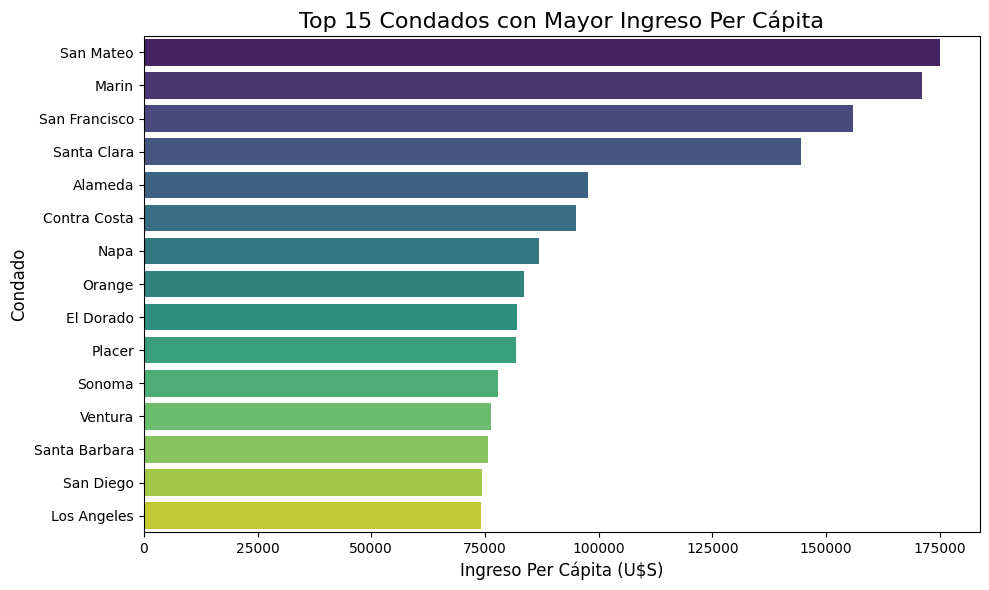

In [14]:
df_top15 = df_censo[['County', 'Per capita income']].sort_values(by='Per capita income', ascending=False).head(15)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Per capita income', y='County', data=df_top15, hue='County', palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title('Top 15 Condados con Mayor Ingreso Per Cápita', fontsize=16)
plt.xlabel('Ingreso Per Cápita (U$S)', fontsize=12)
plt.ylabel('Condado', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Aquí tenemos una primera aproximación a un detalle demográfico y económico del estado de la población. Sin embargo, este dato no contempla la densidad poblacional, por lo que no permite apreciar debidamente el grado de consumo que ese promedio de ingreso per capita traslada al consumo.

Podemos comprender mejor este concepto con un ejemplo:
Si tengo una población de 10 habitantes, y abro una tienda de Café, es probable que venda un promedio de 7/8 cafés por día. Si la población fuera de 100 habitantes, considerando una tendencia de consumo similar, la venta alcanzaría unos 70 cafés por día.


Ahora supongamos que la primera población tiene un ingreso per capita considerable: puede que ese promedio esté por arriba de los 10 cafés diarios (todos los habitantes tomarían un café por día) y tal vez cerca de los 20 (más de un café por habitante). Por su parte, la población de 100 habitantes, incluso si baja considerablemente su ingreso per capita; es muy probable que supere rotundamente los 10 a 20 cafés que consume la población de 10 habitantes.

Por ese motivo, este dato no puede ser considerado en forma aislada, sino que debe ser acompañado por otros factores.
Sin embargo, es correcto el procedimiento de medir, en primer lugar, la riqueza promedio. 

El ingreso per cápita generalmente se mide sobre un período de un año. Esta es la práctica estándar porque proporciona una visión clara y completa de los ingresos que recibe cada persona en promedio durante un ciclo económico completo. Es una medida útil para analizar tendencias económicas y compararlas entre diferentes regiones o grupos demográficos.


## Censo Económico de los Estados Unidos
En el Censo Económico de los Estados Unidos, el ingreso per cápita también se mide anualmente. Los datos de ingresos individuales y familiares recopilados por la Oficina del Censo de EE. UU. suelen referirse a los ingresos brutos anuales obtenidos en un año calendario completo (del 1 de enero al 31 de diciembre).

Estos ingresos incluyen:

- Salarios y sueldos.
- Beneficios como seguridad social.
- Ingresos por inversiones.
- Otros tipos de ingreso (bonificaciones, trabajos secundarios, etc.).

El uso de este período anual es consistente en la mayoría de los informes económicos y censales para asegurar una comparación uniforme entre diferentes regiones y años.

Exploremos ahora otras formas de medición de la riqueza.

***Valor de renta promedio***

Este valor se refiere a los costos de alquiler (rentas) que un ciudadano debe pagar para vivir en una propiedad en ese condado. Esto es una referencia del costo de vida de cada habitante o grupo familiar.

Es un dato interesante, porque existe una relación general entre el valor de alquiler de una vivienda y el valor de alquiler de oficinas para una empresa, o locales para un comercio, aunque ambos tipos de propiedades siguen dinámicas de mercado diferentes. 

Tanto el alquiler residencial como el alquiler comercial están fuertemente influenciados por la ubicación. Las áreas metropolitanas con alta demanda residencial también tienden a tener altos precios de alquiler comercial.
En ciudades grandes, como Los Ángeles o San Francisco, los altos precios de vivienda suelen reflejarse también en altos costos de alquiler comercial debido a la competencia por el espacio.
Si la demanda residencial es alta, puede existir presión para convertir espacios comerciales en propiedades residenciales, lo que puede aumentar los precios de ambos tipos de alquiler.
En áreas con crecimiento de negocios, la demanda por oficinas puede ser alta, lo que incrementa los costos tanto para viviendas como para comercios, ya que la oferta de terrenos es limitada.
En zonas urbanas, donde los precios residenciales son más altos, el costo de alquilar oficinas también tiende a ser mayor. Las empresas pagan más por ubicarse cerca de sus clientes o empleados.
En zonas suburbanas o rurales, tanto los precios de alquiler de viviendas como de oficinas suelen ser más bajos.

En síntesis, si bien no es un dato absoluto, sí aporta nuevos parámetros económicos que pueden ser de interés para nuestro análisis.

In [17]:
df_censo['Rent'].describe()

count      59.000000
mean     2474.118644
std       489.609559
min      1398.000000
25%      2276.500000
50%      2440.000000
75%      2727.500000
max      3556.000000
Name: Rent, dtype: float64

Podemos ver que el valor de renta promedio en todo el Estado de California es intermedio: U$S 489,61. Los precios más altos alcanzan los U$S 3556, lo que es un valor considerablemente alto. Esto habla, prima facie, de un valor alto del costo de vida. Sin embargo, la distribución de propiedades del Estado da cuenta que hay muchas viviendas realmente muy costosas, y otras no tanto. Analicemos los condados con mayor y menor valor de renta promedio.


In [18]:
renta_condados = df_censo[['County', 'Rent']].sort_values(by='Rent', ascending=False)
renta_condados.head(15) #Podremos ver los 15 condados con mayor valor de renta, en promedio.

,County,Rent
20,Marin,3556
37,San Francisco,3393
42,Santa Clara,3342
40,San Mateo,3314
43,Santa Cruz,3309
15,Kings,3296
41,Santa Barbara,3123
29,Orange,3060
27,Napa,3023
36,San Diego,2932


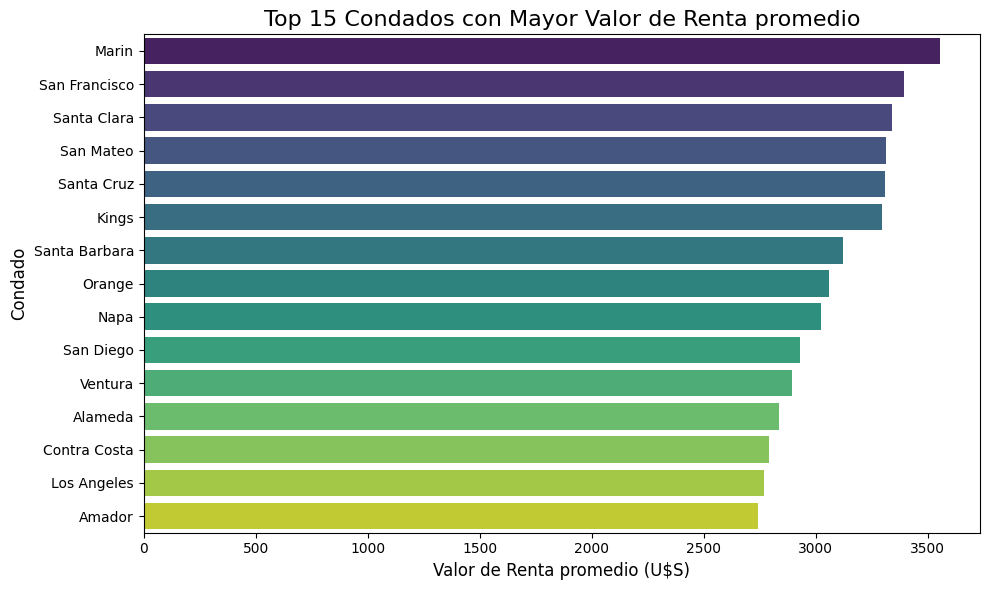

In [19]:
df_top15 = df_censo[['County', 'Rent']].sort_values(by='Rent', ascending=False).head(15)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Rent', y='County', data=df_top15, hue='County', palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title('Top 15 Condados con Mayor Valor de Renta promedio', fontsize=16)
plt.xlabel('Valor de Renta promedio (U$S)', fontsize=12)
plt.ylabel('Condado', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Condados como Marín, San Francisco o Santa Clara tienen un valor de renta muy alto. Por otro lado, aparecen en un rango intermedio otros condados importantes como Orange, Los Ángeles y San Diego. Veamos el orden inverso.

In [21]:
renta_condados = df_censo[['County', 'Rent']].sort_values(by='Rent', ascending=False)
renta_condados.tail(15) #Podremos ver los 15 condados con menor valor de renta, en promedio.

,County,Rent
58,Acton,2275
7,Del Norte,2273
17,Lassen,2253
33,Sacramento,2134
19,Madera,1920
16,Lake,1916
50,Sutter,1889
49,Stanislaus,1867
23,Merced,1848
9,Fresno,1827


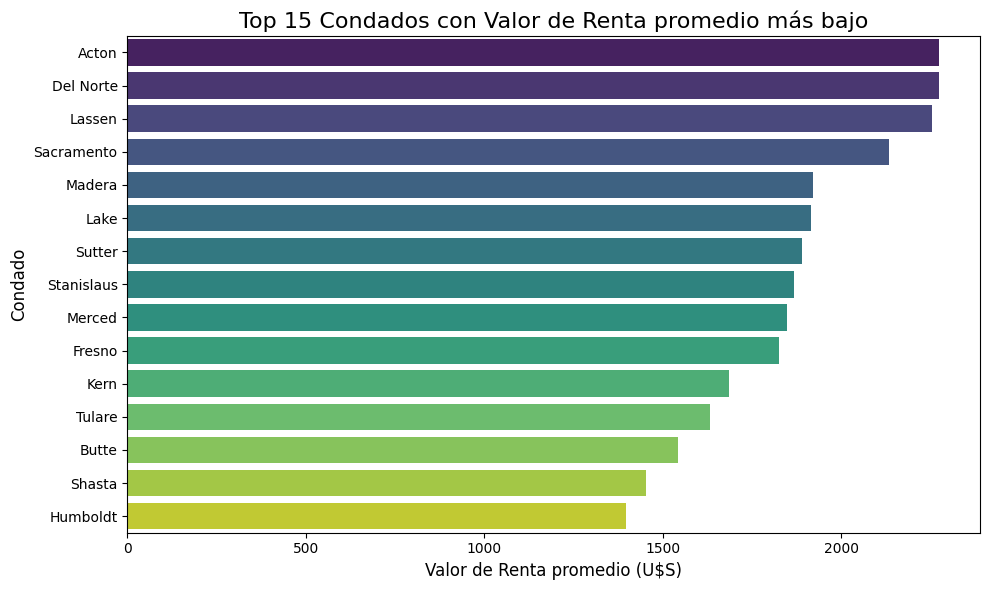

In [23]:
df_last15 = df_censo[['County', 'Rent']].sort_values(by='Rent', ascending=False).tail(15)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Rent', y='County', data=df_last15, hue='County', palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title('Top 15 Condados con Valor de Renta promedio más bajo', fontsize=16)
plt.xlabel('Valor de Renta promedio (U$S)', fontsize=12)
plt.ylabel('Condado', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Los condados con menor valor de renta suelen ser aquellos que, como indica la tendencia general, suelen tener menor cantidad de habitantes. Se destacan los condados de Acton y Sacramento, aunque se encuentran en un valor moderadamente cercano a condados como Los Ángeles.

***Costo promedio de la propiedad**

Otro elemento para medir la riqueza es el costo de la propiedad. En primer lugar, porque existe una relación entre costo de la propiedad y valor de renta, por lo que ello implica un análisis extensivo al punto anterior. Pero, además, porque existe una relación directa entre mayor riqueza y mayor consumo.
El hecho es que, como se indicó con anterioridad, el estudio de estos parámetros aisladamente ofrece datos incompletos, ya que una población con menor riqueza pero mayor densidad poblacional, probablemente tenga parámetros de consumo mayores.

In [26]:
df_censo['Property Cost'].describe()

count    5.900000e+01
mean     6.560522e+05
std      3.817408e+05
min      2.050000e+05
25%      4.234600e+05
50%      5.002270e+05
75%      8.184700e+05
max      1.950000e+06
Name: Property Cost, dtype: float64

Como podemos observar, el valor promedio (que figura en notación científica) de valor de las propiedades en el Estado de California ronda los U$S656.052,20.

El valor mínimo es de U$S205.000; y el valor máximo es U$S1.950.000,00.
Hablamos es un Estado con propiedades muy variables, donde el valor de la propiedad más costosa representa diez veces el valor de la propiedad menos costosa. Podemos analizar los diferentes condados.

In [28]:
prop_condados = df_censo[['County', 'Property Cost']].sort_values(by='Property Cost', ascending=False)
prop_condados.head(15) #Podremos ver los 15 condados con mayor valor de propiedades, en promedio.

,County,Property Cost
40,San Mateo,1950000
42,Santa Clara,1852500
37,San Francisco,1576000
20,Marin,1475000
41,Santa Barbara,1295000
0,Alameda,1250000
43,Santa Cruz,1200000
27,Napa,1055000
36,San Diego,1000000
25,Mono,970000


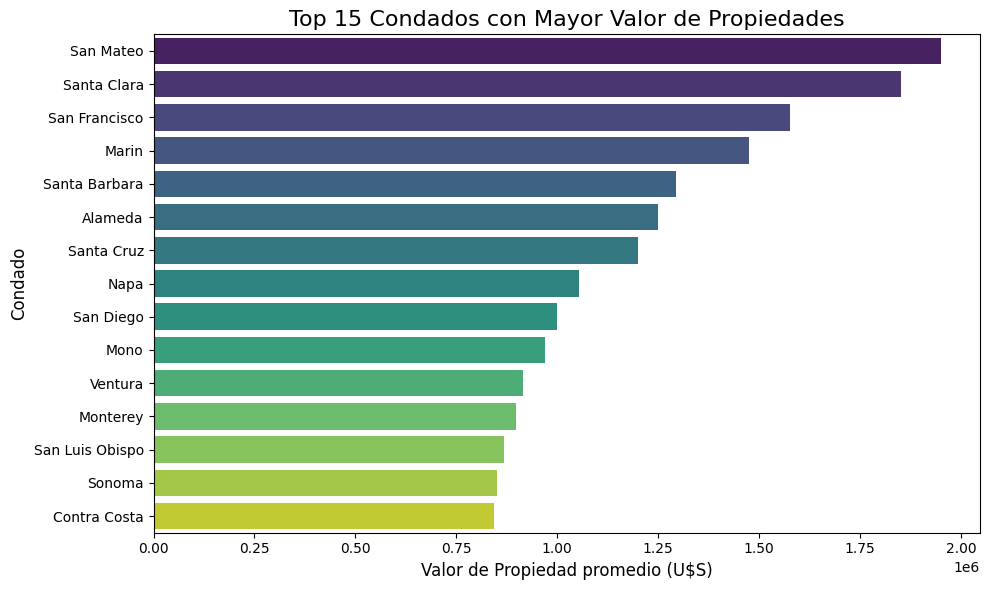

In [29]:
df_top15 = df_censo[['County', 'Property Cost']].sort_values(by='Property Cost', ascending=False).head(15)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Cost', y='County', data=df_top15, hue='County', palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title('Top 15 Condados con Mayor Valor de Propiedades', fontsize=16)
plt.xlabel('Valor de Propiedad promedio (U$S)', fontsize=12)
plt.ylabel('Condado', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Podemos ver que, en principio, quedan fuera del top 15 condados como Los Ángeles. Adelantándonos a los motivos, seguramente nos encontraremos con una ciudad de gran densidad poblacional.
Veamos ahora los Estados con menor valor de las propiedades.

In [30]:
prop_condados = df_censo[['County', 'Property Cost']].sort_values(by='Property Cost', ascending=False)
prop_condados.tail(15) #Podremos ver los 15 condados con menor valor de propiedades, en promedio.

,County,Property Cost
11,Humboldt,421920
31,Plumas,412000
14,Kern,394500
54,Tuolumne,389500
23,Merced,385000
7,Del Norte,382500
15,Kings,382500
53,Tulare,372000
44,Shasta,365000
12,Imperial,336500


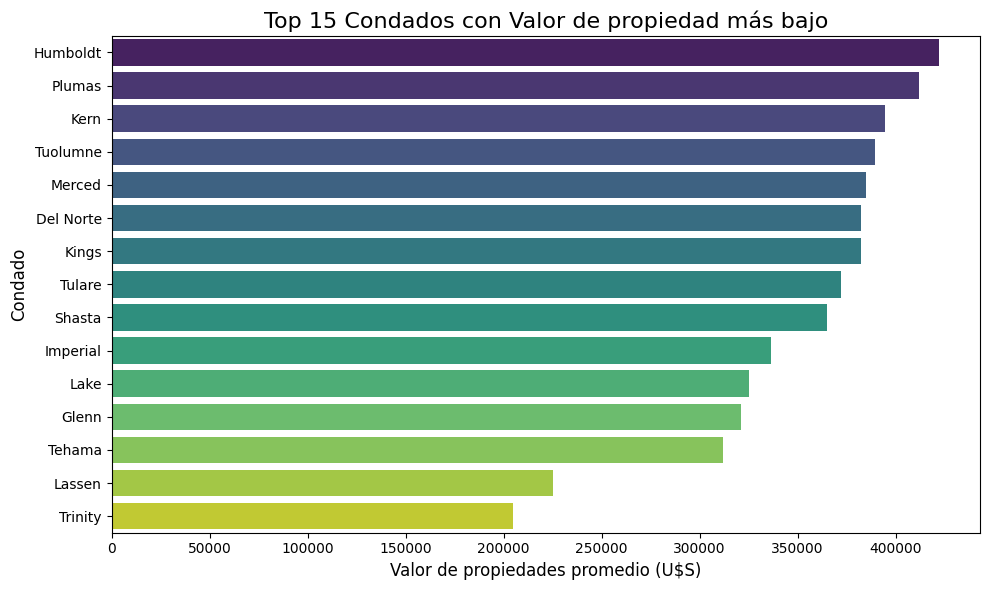

In [31]:
df_last15 = df_censo[['County', 'Property Cost']].sort_values(by='Property Cost', ascending=False).tail(15)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Cost', y='County', data=df_last15, hue='County', palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title('Top 15 Condados con Valor de propiedad más bajo', fontsize=16)
plt.xlabel('Valor de propiedades promedio (U$S)', fontsize=12)
plt.ylabel('Condado', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Bien, hemos analizado individualmente los primeros indicadores de riqueza, ingresos y costos de vida. Ahora agregaremos, dos nuevos registros de análisis: Población e Ingreso familiar medio (o ingreso por hogar). Ambos datos ofrecen un margen de corrección de los datoa analizados hasta aquí.

In [4]:
df_economicos = pd.read_csv(r'C:\Users\GASTON\Desktop\PROYECTO FINAL\DATA\datos_economicos.csv')
df_economicos.head(3)

,County,Per capita income,Rent,Property Cost,Population,Median Household Income
0,Alameda,97754,2837,1250000,1796932,121190
1,Alpine,67551,2010,434031,604076,71646
2,Amador,48463,2077,490000,257457,74356


**Análisis de Población: cantidad de habitantes**

In [6]:
df_economicos['Population'].sum()

39499971

De acuerdo al Censo realizado en el año 2022 por el Census Bureau of United Stated, el Estado de California tiene 39.4 millones de habitantes. Para tomar perspectiva, sólo uno de los 50 estados de Estados Unidos tiene la misma población que Argentina o que Sudáfrica. Veamos ahora un análisis por Condado.

In [34]:
# Ordenar el DataFrame por la columna 'Population' de forma descendente
top_15_condados = df_economicos.sort_values(by='Population', ascending=False).head(15)

# Mostrar el resultado
top_15_condados[['County', 'Population']]


,County,Population
18,Los Angeles,7938792
29,Orange,2483719
36,San Diego,2288365
0,Alameda,1796932
32,Riverside,1753111
35,San Bernardino,1686219
42,Santa Clara,1397031
6,Contra Costa,1372893
33,Sacramento,911150
7,Del Norte,806177


Como habíamos previsto anteriormente, Los Ángeles encabeza la lista de población, seguida por Orange, San Diego y Alameda.

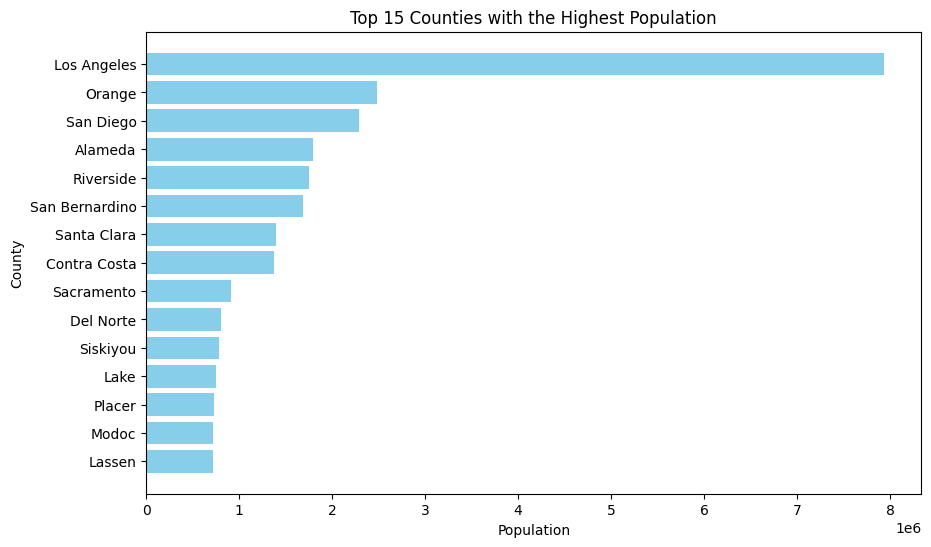

In [36]:
# Ordenar el DataFrame por la columna 'Population' de forma descendente y tomar el top 15
top_15_condados = df_economicos.sort_values(by='Population', ascending=False).head(15)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_15_condados['County'], top_15_condados['Population'], color='skyblue')
plt.xlabel('Population')
plt.ylabel('County')
plt.title('Top 15 Counties with the Highest Population')
plt.gca().invert_yaxis()  # Invertir el eje y para que el mayor valor esté en la parte superior
plt.show()

In [39]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por la columna 'Population' de forma ascendente y tomar el top 15
bottom_15_condados = df_economicos.sort_values(by='Population', ascending=True).head(15)

bottom_15_condados[['County','Population']]

,County,Population
4,Calaveras,16917
8,El Dorado,16934
11,Humboldt,20673
34,San Benito,35876
5,Colusa,46848
19,Madera,54692
50,Sutter,55163
39,San Luis Obispo,63420
27,Napa,79403
57,Yuba,81411


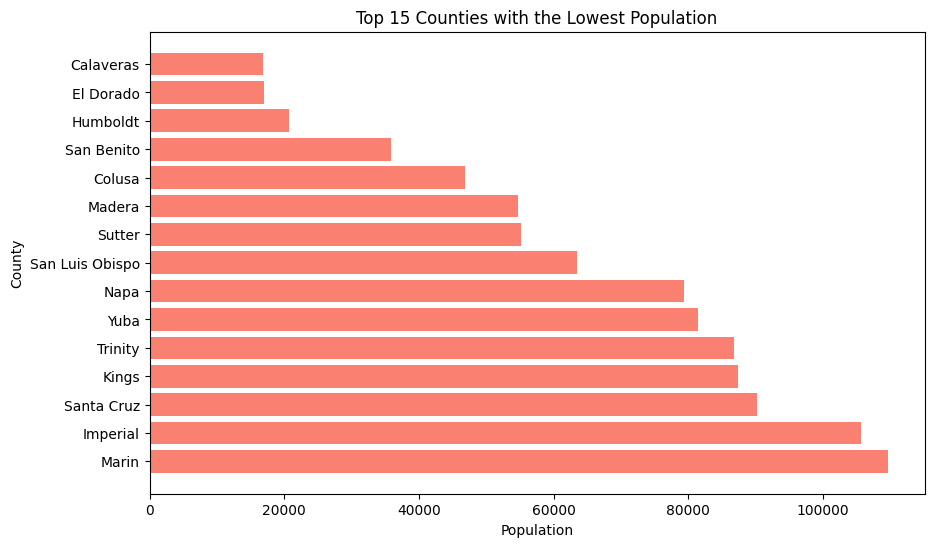

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(bottom_15_condados['County'], bottom_15_condados['Population'], color='salmon')
plt.xlabel('Population')
plt.ylabel('County')
plt.title('Top 15 Counties with the Lowest Population')
plt.gca().invert_yaxis()  # Invertir el eje y para que el menor valor esté en la parte superior
plt.show()


No se pueden sacar grandes conclusiones del análisis de la población a secas, pero sí lo haremos al analizar las variables conjuntamente.

**Ingreso por Hogar**

Este dato aporta información sobre la estimación de ingresos, similar al ingreso per capita, pero esta vez por hogar o grupo familiar. Es importante ya que muchos consumos no pueden medirse por persona, sino por estos grupos segmentados.

In [41]:
df_economicos['Median Household Income'].describe()

count        58.000000
mean     112211.500000
std      118449.195351
min       51166.000000
25%       66362.250000
50%       83220.000000
75%      105800.250000
max      781721.000000
Name: Median Household Income, dtype: float64

Observamos un ingreso promedio anual de U$S112.211,50  por hogar en todo el Estado de California. El ingreso mínimo es de U$S51.166; mientras que el máximo alcanza los U$S781.721.
Analicemos por condados estos datos.

In [44]:
# Ordenar el DataFrame por la columna 'Median Household Income' de forma descendente y tomar el top 15
top_15_income = df_economicos.sort_values(by='Median Household Income', ascending=False).head(15)
top_15_income[['County', 'Median Household Income']]

,County,Median Household Income
16,Lake,781721
29,Orange,626964
11,Humboldt,209436
3,Butte,184966
43,Santa Cruz,152723
42,Santa Clara,150502
40,San Mateo,143795
15,Kings,136927
20,Marin,135960
37,San Francisco,135366


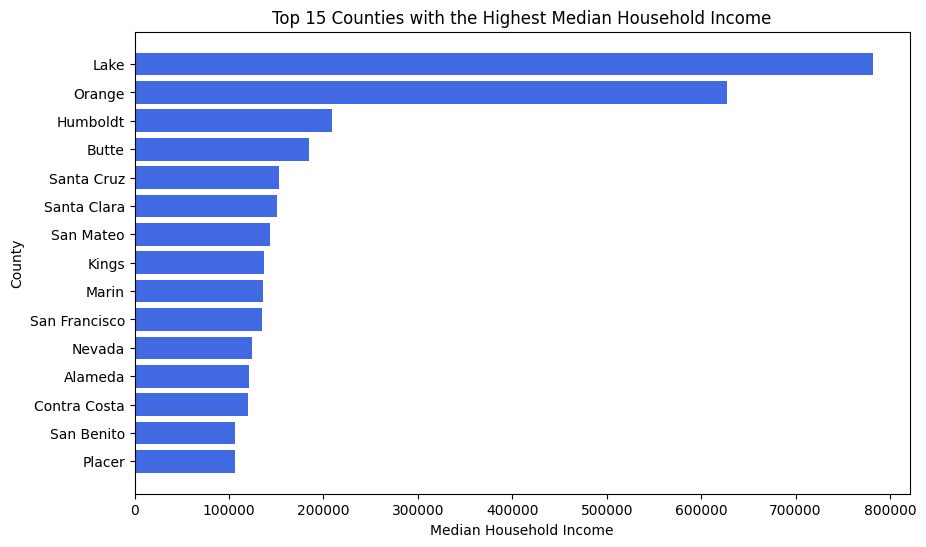

In [45]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_15_income['County'], top_15_income['Median Household Income'], color='royalblue')
plt.xlabel('Median Household Income')
plt.ylabel('County')
plt.title('Top 15 Counties with the Highest Median Household Income')
plt.gca().invert_yaxis()  # Invertir el eje y para que el mayor valor esté en la parte superior
plt.show()


Aquí aparecen ciertas cuestiones que hacen un poco de ruido a nuestro análisis. Vemos que hay un mayor ingreso por hogar en condados con pocos habitantes, como Lake.
Se destaca el condado de Orange, con gran cantidad de habitantes y un alto ingreso por grupo familiar.

In [46]:
# Ordenar el DataFrame por la columna 'Median Household Income' de forma ascendente y tomar el top 15
bottom_15_income = df_economicos.sort_values(by='Median Household Income').head(15)

bottom_15_income[['County','Median Household Income']]

,County,Median Household Income
24,Modoc,51166
46,Siskiyou,51593
12,Imperial,55523
7,Del Norte,57297
51,Tehama,58900
17,Lassen,60308
10,Glenn,63247
22,Mendocino,63621
57,Yuba,63626
53,Tulare,64313


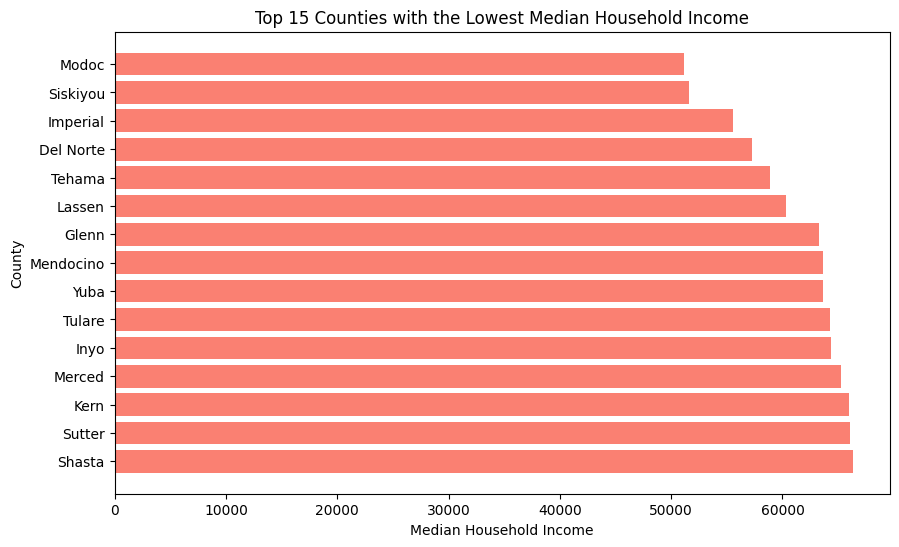

In [47]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(bottom_15_income['County'], bottom_15_income['Median Household Income'], color='salmon')
plt.xlabel('Median Household Income')
plt.ylabel('County')
plt.title('Top 15 Counties with the Lowest Median Household Income')
plt.gca().invert_yaxis()  # Invertir el eje y para que el menor valor esté en la parte superior
plt.show()


Ninguno de los condados con ingresos por grupo familiar más bajo se destacan por sus habitantes. Tal vez Mendocino destaque por ser un condado de gran atractivo turístico. Esto nos permite comenzar a descartar ese condado como alternativa.

## Correlación entre variables

Analicemos la relación entre Población e Ingreso per cápita. Comencemos con un gráfico de dispersión.

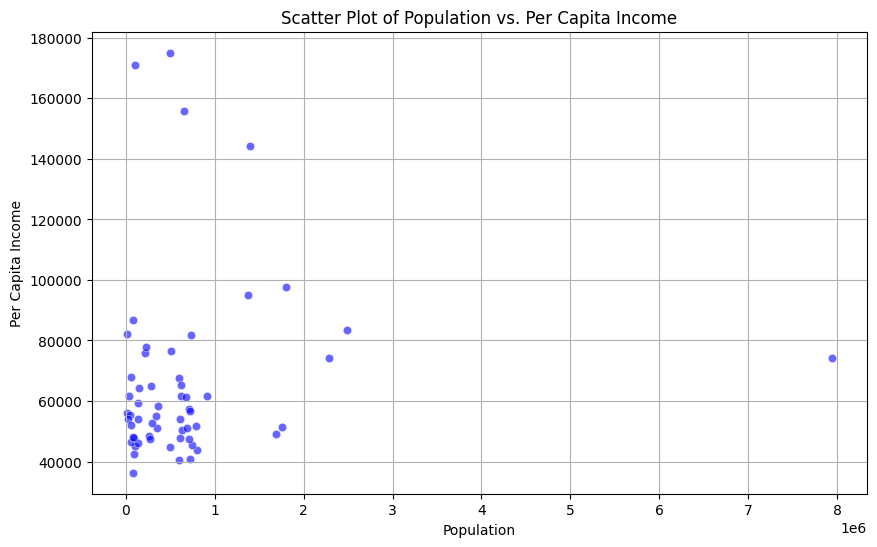

In [48]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_economicos, x='Population', y='Per capita income', color='blue', alpha=0.6)
plt.title('Scatter Plot of Population vs. Per Capita Income')
plt.xlabel('Population')
plt.ylabel('Per Capita Income')
plt.grid(True)
plt.show()


In [49]:
#Análisis de correlación

correlation = df_economicos['Population'].corr(df_economicos['Per capita income'])
print(f'Correlation between Population and Per Capita Income: {correlation}')


Correlation between Population and Per Capita Income: 0.11991236095242079


Vemos una correlación positiva muy débil. Ahora agrupemos por el ingreso per capita, para identificar la población resultante.

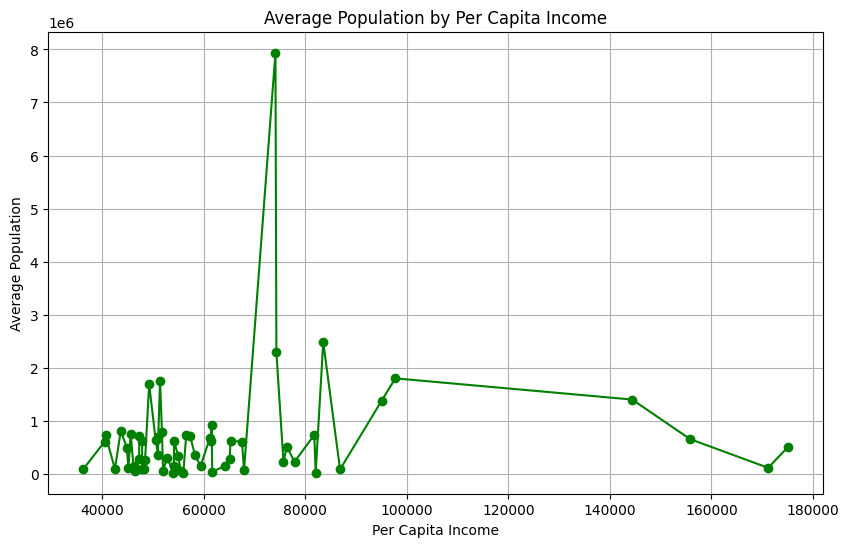

In [50]:
# Agrupar por Per capita income y calcular la población promedio
income_population_analysis = df_economicos.groupby('Per capita income')['Population'].mean().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(income_population_analysis['Per capita income'], income_population_analysis['Population'], marker='o', color='green')
plt.title('Average Population by Per Capita Income')
plt.xlabel('Per Capita Income')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()


Se observa claramente el mismo outlier del gráfico de dispersión. Usaremos un boxplot para entender la distribución en diferentes rangos de la población.

C:\Users\GASTON\AppData\Local\Temp\ipykernel_5760\336843415.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_economicos, x='Population Range', y='Per capita income', palette='Set2')


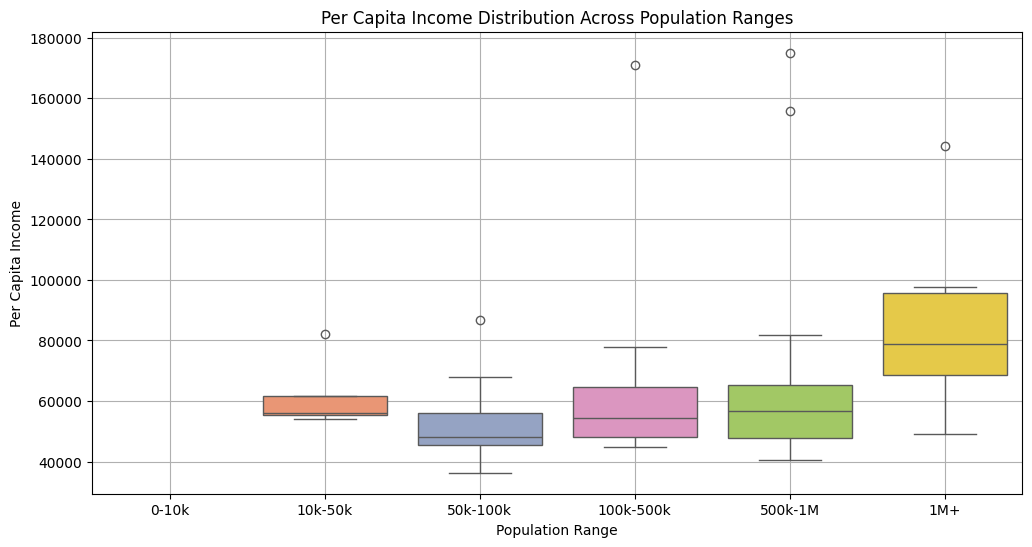

In [51]:
# Definir los rangos de población
bins = [0, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M+']
df_economicos['Population Range'] = pd.cut(df_economicos['Population'], bins=bins, labels=labels)

# Crear un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_economicos, x='Population Range', y='Per capita income', palette='Set2')
plt.title('Per Capita Income Distribution Across Population Ranges')
plt.xlabel('Population Range')
plt.ylabel('Per Capita Income')
plt.grid(True)
plt.show()


La correlación de 0.1199 entre la población y el ingreso per cápita indica una relación positiva muy débil. Esto significa que, en general, no hay una relación fuerte entre el tamaño de la población de un condado y su ingreso per cápita. Aquí hay algunas interpretaciones y conclusiones que puedes considerar a partir de este resultado:

La correlación positiva sugiere que a medida que aumenta la población, también tiende a aumentar el ingreso per cápita, pero la relación es tan débil que sugiere que otros factores tienen una influencia mucho más significativa en el ingreso per cápita que simplemente la población.

Esta débil correlación puede indicar que los condados con una alta población pueden tener economías diversas. Por ejemplo, una ciudad grande puede tener tanto áreas con altos ingresos como barrios con ingresos bajos, lo que lleva a una media de ingresos per cápita que no refleja necesariamente la calidad de vida en todas las partes del condado.


Existen otros factores que podrían influir en el ingreso per cápita, como la educación, la industria predominante, las oportunidades laborales, el costo de vida, y las políticas gubernamentales. La población por sí sola no captura la complejidad económica de un área.

En general, los condados rurales pueden tener una población menor y un ingreso per cápita que varía ampliamente debido a la agricultura u otras industrias específicas, mientras que las áreas urbanas pueden tener una población alta pero también una gran disparidad en ingresos.


Dado que la correlación es tan débil, será útil realizar un análisis más profundo que considere múltiples variables simultáneamente para entender mejor cómo interactúan la población, el ingreso per cápita y otros factores socioeconómicos.


**Matriz de correlación**

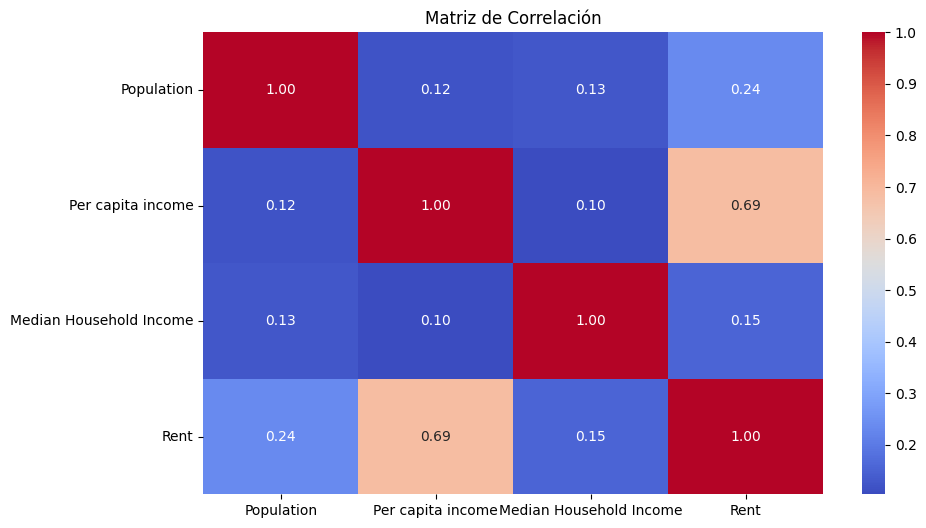

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_economicos[['Population', 'Per capita income', 'Median Household Income', 'Rent']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


**Regresión Lineal**

In [53]:
import statsmodels.api as sm

# Preparar los datos para la regresión
X = df_economicos['Population']
y = df_economicos['Median Household Income']
X = sm.add_constant(X)  # Agregar constante

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     Median Household Income   R-squared:                       0.016
Model:                                 OLS   Adj. R-squared:                 -0.002
Method:                      Least Squares   F-statistic:                    0.9083
Date:                   vie., 27 sep. 2024   Prob (F-statistic):              0.345
Time:                             06:54:13   Log-Likelihood:                -758.90
No. Observations:                       58   AIC:                             1522.
Df Residuals:                           56   BIC:                             1526.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Observemos ahora distintos gráficos de dispersión**

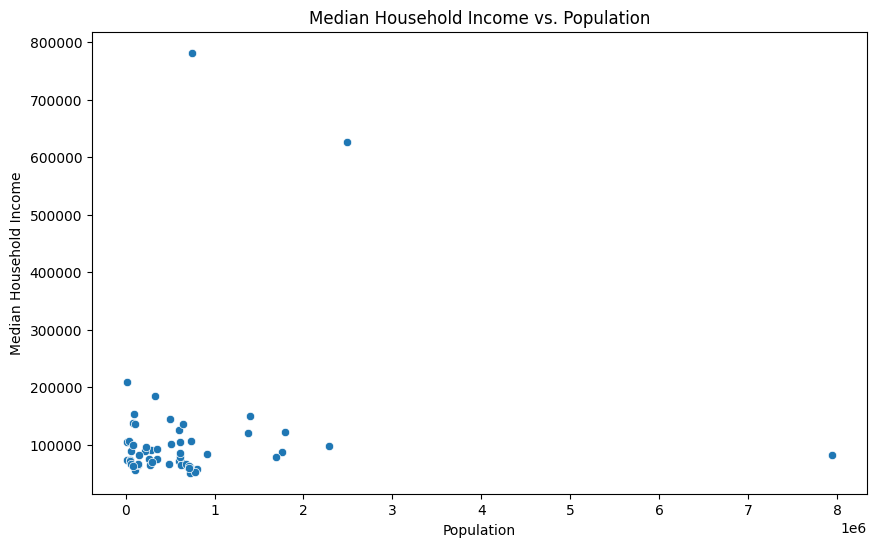

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_economicos, x='Population', y='Median Household Income')
plt.title('Median Household Income vs. Population')
plt.xlabel('Population')
plt.ylabel('Median Household Income')
plt.show()


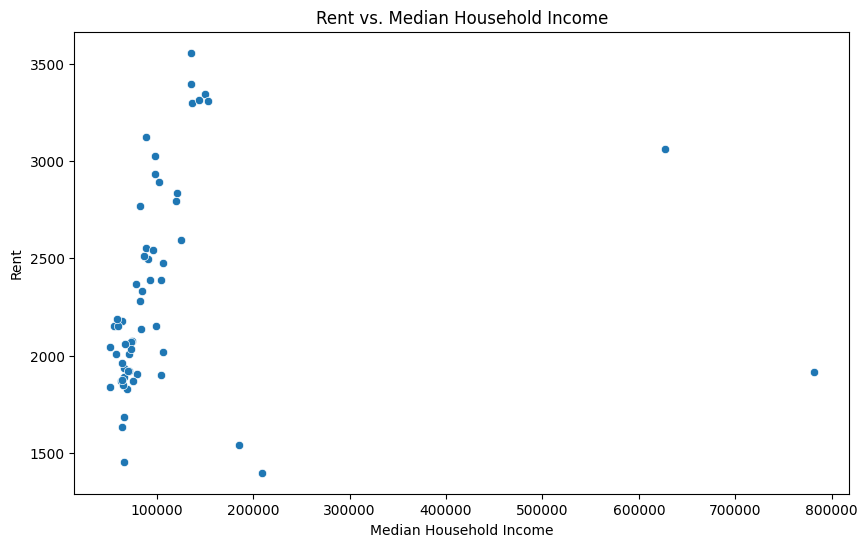

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_economicos, x='Median Household Income', y='Rent')
plt.title('Rent vs. Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Rent')
plt.show()


Realizaremos un análisis de regresión lineal entre Rent y Median Household Income.

In [56]:
# Preparar los datos para la regresión
X_rent = df_economicos['Median Household Income']
y_rent = df_economicos['Rent']
X_rent = sm.add_constant(X_rent)  # Agregar constante

# Ajustar el modelo
model_rent = sm.OLS(y_rent, X_rent).fit()

# Imprimir el resumen del modelo
print(model_rent.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.357
Date:              vie., 27 sep. 2024   Prob (F-statistic):              0.249
Time:                        06:55:39   Log-Likelihood:                -445.73
No. Observations:                  58   AIC:                             895.5
Df Residuals:                      56   BIC:                             899.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

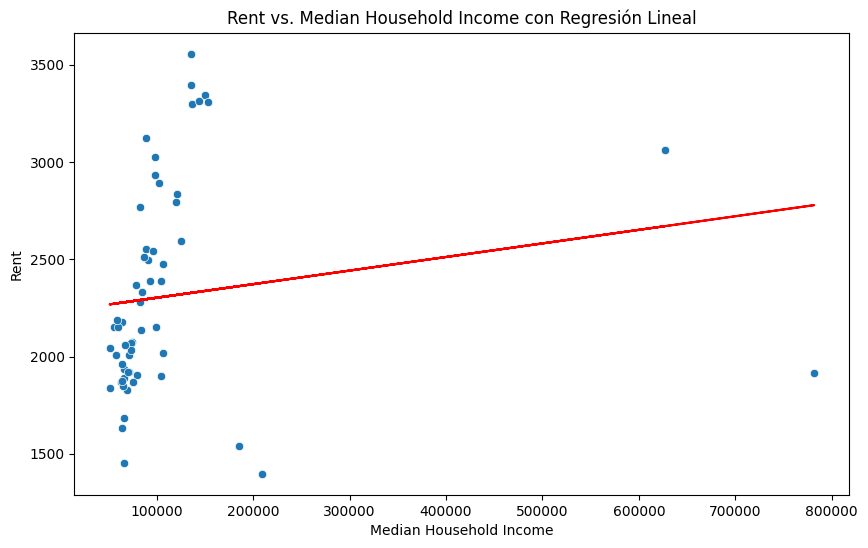

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_economicos, x='Median Household Income', y='Rent')
plt.plot(df_economicos['Median Household Income'], model_rent.predict(X_rent), color='red')  # Línea de regresión
plt.title('Rent vs. Median Household Income con Regresión Lineal')
plt.xlabel('Median Household Income')
plt.ylabel('Rent')
plt.show()


## Conclusiones

Generalmente, una mayor población puede estar asociada a un mayor potencial económico, ya que indica un mercado más amplio y una mayor demanda de bienes y servicios. Sin embargo, el análisis realizado mostró que la correlación entre la población y el ingreso familiar mediano es débil, lo que sugiere que no siempre un mayor número de habitantes se traduce en un ingreso más alto. Hay que ser prudentes y considerar otros factores, y no sólo la cantidad de habitantes.

Respecto al ingreso familiar, un ingreso más alto generalmente permite a los residentes gastar más en entretenimiento y servicios, lo que podría ser positivo para el sector gastronómico.

El costo del alquiler es un factor crucial para las empresas, especialmente para aquellas en el sector de la gastronomía. Condados con un alquiler relativamente bajo, pero con un ingreso familiar mediano alto, podrían presentar un buen equilibrio entre costos y potencial de gasto por parte de los consumidores, **aunque estaríamos en un terreno de inversiones de riesgo**.
Por ello, es interesante considerar que condados con altos costos de alquiler pero también altos ingresos familiares podrían ofrecer un mercado de consumidores dispuestos a gastar, lo que podría ser atractivo para nuevas inversiones.

***Podemos hacer una primera apreciación sobre las Ciudades con Mejor Potencial Económico en California.*** Basándonos en el análisis de población e ingreso familiar mediano, algunas de las ciudades de California que pueden ser consideradas con mejor potencial económico para inversiones gastronómicas son:

- Los Ángeles:
Alta población con un ingreso familiar mediano significativo.
Diversidad en la oferta gastronómica y una cultura culinaria vibrante que atrae a consumidores locales y turistas.

- San Francisco:
Uno de los ingresos familiares medianos más altos del estado, aunque con costos de alquiler elevados.
La población tiene un alto poder adquisitivo, lo que puede traducirse en un mercado próspero para restaurantes y negocios gastronómicos.

- San Diego:
Buen equilibrio entre población y ingreso familiar mediano.
Costo de vida más bajo en comparación con San Francisco, lo que podría ser favorable para nuevas inversiones.

- San José:
Alta población y uno de los ingresos familiares medianos más altos, impulsado por la industria tecnológica.
Potencial de crecimiento en el sector gastronómico, especialmente en áreas de nueva construcción y desarrollo.

- Sacramento:
Menor costo de vida en comparación con otras ciudades de California, combinado con un ingreso familiar mediano razonable.
Una población en crecimiento que podría resultar en un aumento de la demanda de servicios gastronómicos.


**Consideraciones Finales**:

Las decisiones de inversión en el sector gastronómico deben considerar no solo el ingreso y la población, sino también factores como el costo del alquiler, la competencia en el área y las tendencias del consumidor.
Es recomendable realizar un análisis más profundo que incluya variables adicionales, como el gasto promedio en restaurantes, las tendencias de crecimiento de la población y la accesibilidad de la ubicación, para obtener una perspectiva más completa.

Este informe puede servir de punto de partida para analizar preferencias de consumo y ubicaciones de los locales gastronómicos existentes.